# Regressie - intro

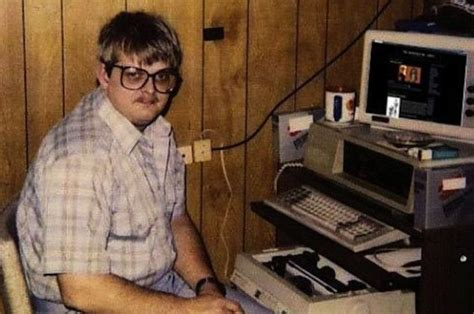

## Install

In [131]:
!pip3 install numpy
!pip3 install scipy

## Import

In [324]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp
np.random.seed(42)

## Predefine

In [15]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    
    ax.plot(x, y, linewidth=2.0)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

## Lineair verband
### Model
huizenprijs = vastgoed offset + prijs per oppervlak x oppervlak

p = 25.000 + 5.000 x oppervlak

### Stap 1: Maak huizenprijs model

In [325]:
# create a function which outputs the house price for a given surface value

def get_price(m_2, offset_price = 25000, opp_price = 5000):
    
    return offset_price + (opp_price * m_2)


### Stap 2: Bekijk interval [50, 75] m2

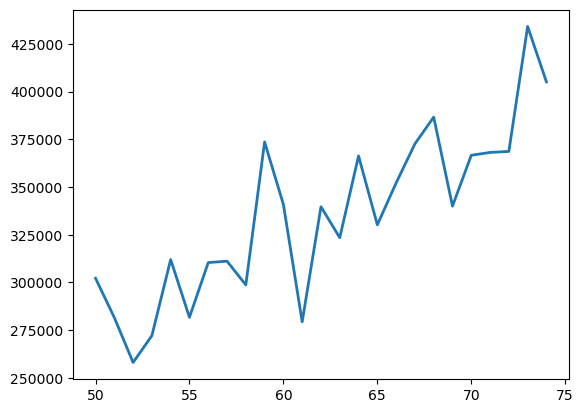

In [364]:
#we can create an array of the surface values in the 50-75 range
np_surfaces = np.arange(50, 75)

#we then create an array of the house prices for the range of surface values
np_prices = np.array([get_price(n) for n in range(50,75)])


#adding noise to the np_prices array, and overwriting it. In this case the noise ranges between 0 and 25000
np_prices = np.random.normal(np_prices, 25000)

#we can plot the values with the surface on the x-axis and the prices on the y-axis
plot_graph(np_surfaces, np_prices)

### Stap 3: Fit data

#### Use the curve fitting

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

[16863.13224234  5131.57067505]


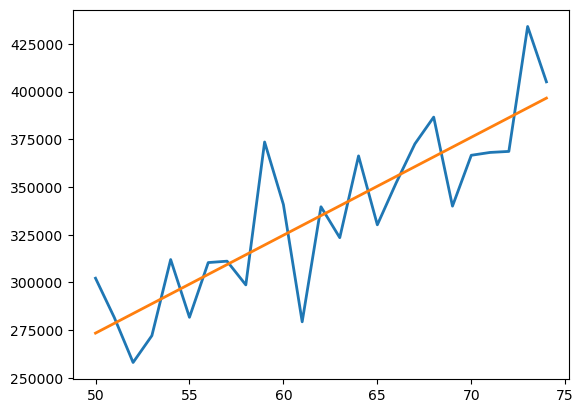

In [365]:
#The final step is optimizing the fit of the model, which will return two values:
    #an optimal 'a' and an optimal 'b' value which we can plug into our model
    
#print(cp.optimize.curve_fit(get_price, np_surfaces, np_prices))


def func(x, a, b):
    return a + b * x

house_prices_fit, _ = cp.optimize.curve_fit(func, np_surfaces, np_prices)

print(house_prices_fit)


house_prices_prediction = house_prices_fit[0] + house_prices_fit[1] * np_surfaces


ax = plot_init()

plot_add(ax, np_surfaces, np_prices)

plot_add(ax, np_surfaces, house_prices_prediction)


# Create fit


### Stap 4: Extrapoleer

530020.1997476228
525000


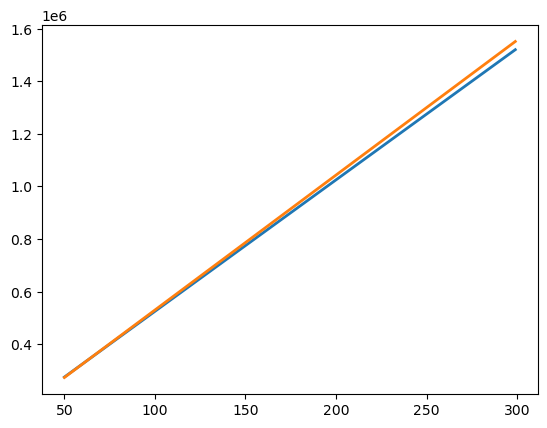

In [366]:
#now we can extrapolate using the optimized fit values for a and b, namely:

def optimized_price(x, a = house_prices_fit[1], b = house_prices_fit[0]):
    return a * x + b

#we can now compare the two fits
print(optimized_price(100))
print(get_price(100))



#we can compare the two lines by plotting them
a_x = plot_init()

#we'll do this for the whole range of prices from 50 m2 to 300 m2
all_surfaces_array = np.arange(50, 300)

first_model = np.array([get_price(n) for n in all_surfaces_array])
second_model = np.array([optimized_price(n) for n in all_surfaces_array])

plot_add(a_x, all_surfaces_array, first_model)
plot_add(a_x, all_surfaces_array, second_model)

## Polynomiale verbanden

### Model

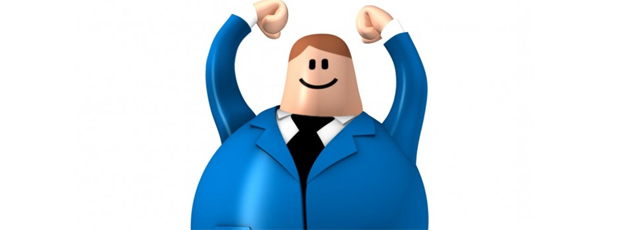

massa bolmannetje = dichtheid x bolvormigheid + benen + armen + hoofd

mass_bolman = 1.03 x radius^3 + 12.4 + 8.7 + 3.2

### Stap 1: Maak model bolmannetje

In [263]:
#we first create a function calculating the mass:

def get_mass(r, density = 1.03, legs = 12.4, arms = 8.7, head = 3.2):
    return density*(r**3) + legs + arms + head

1054.3000000000002

### Stap 2: Fit data

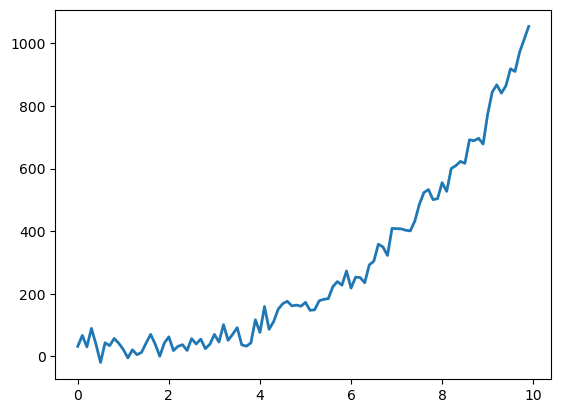

[ 1.02146165e+00  3.03316686e+04 -1.51507689e+04 -1.51507689e+04]


In [379]:
# Define our model

x_array = np.arange(0,10,0.1)
mass_array = np.array([get_mass(n) for n in x_array])

#add_noise

mass_array = np.random.normal(mass_array, 25)

plot_graph(x_array, mass_array)


# Use scipy optimize package

def get_mass_2(x, a, b):
    

# Create fit
fit, _ = cp.optimize.curve_fit(get_mass_2, x_array, mass_array)

print(fit)
# Plot fit

# ...

In [ ]:
def optimized_mass(r, density = fit[0], legs = fit[1], arms = fit[2], head = fit['head']):
    return 

## Combinatie periodiek en exponentieel verband

### Model

Finding Seasonal Trends in Time-Series Data

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861